# Comparing Perple_X results to Abers and Hacker data with varying formation conditions 

In [1]:
using HDF5
using Plots; gr();
using StatGeochem
using DelimitedFiles
using JLD 
using StatsPlots
using CategoricalArrays
using Statistics
using StatsBase

In [2]:
dat = h5read("../data/perplexStability.h5", "res");
cols = ["depth", "temp", "sample", "P", "T", "porosity", 
    "perplex rho", "perplex vp", "perplex vp/vs", "perplex vs", 
    "err vp", "err vpvs", "err vs"];

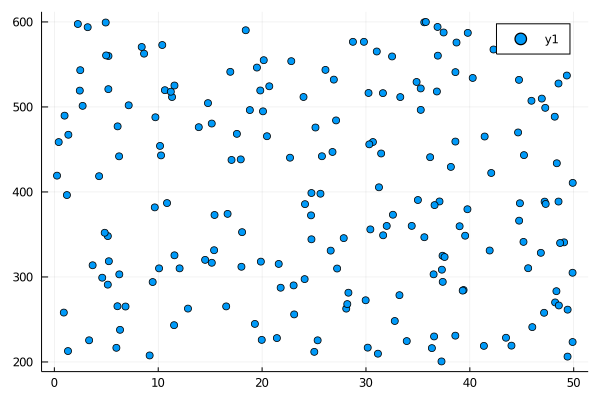

In [3]:
conditions = dat[:,1,1:2]
scatter(conditions[:,1], conditions[:,2])

# How does error and nans change with conditions?

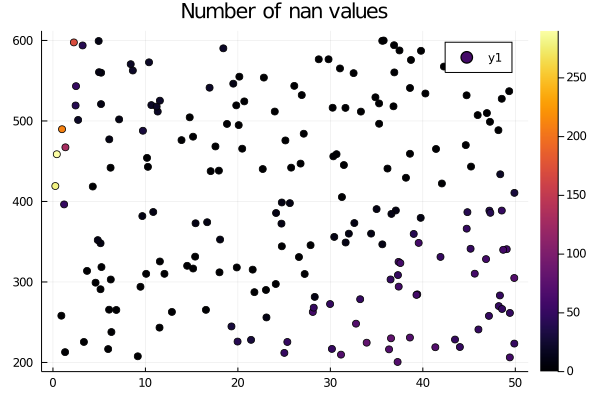

In [4]:
summaries = fill(NaN, (size(dat)[1], 3)); 
summaries[:,1:2] .= conditions;
summaries[:,3] .= sum(isnan.(dat), dims=2)[:,:,8][:]; 

scatter(summaries[:,1], summaries[:,2], zcolor=summaries[:,3], title="Number of nan values")

In [5]:
#scatter(dat[:,:,1][:], dat[:,:,11][:], alpha=.2, ylabel="perplex vp - true", xlabel="Depth")

In [6]:
#scatter(dat[:,:,2][:], dat[:,:,11][:], alpha=.2, ylabel="perplex vp - true", xlabel="Temp")

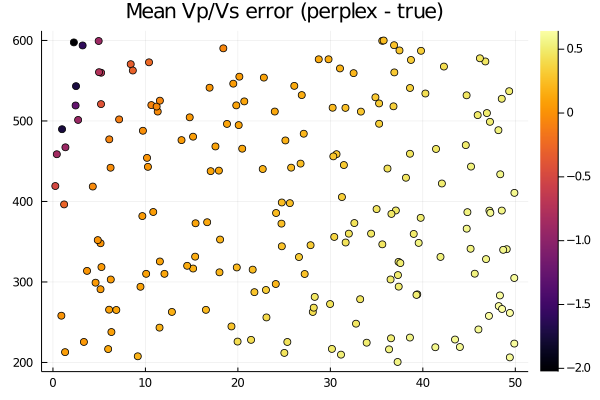

In [81]:
prop = 11 # vp 
#prop = 12 # vpvs 
#prop = 13 # vs

summaries = fill(NaN, (size(dat)[1], 5)); 
summaries[:,1:2] .= conditions;
summaries[:,3] .= nanmean(dat, dims=2)[:,:,prop][:]; 
summaries[:,4] .= nanstd(dat, dims=2)[:,:,prop][:]; 
summaries[:,5] .= sum(isnan.(dat), dims=2)[:,:,8][:];

scatter(summaries[:,1], summaries[:,2], zcolor=summaries[:,3], title="Mean Vp/Vs error (perplex - true)", label=false)
#savefig("../../present/4_16/meanvpvser.pdf")

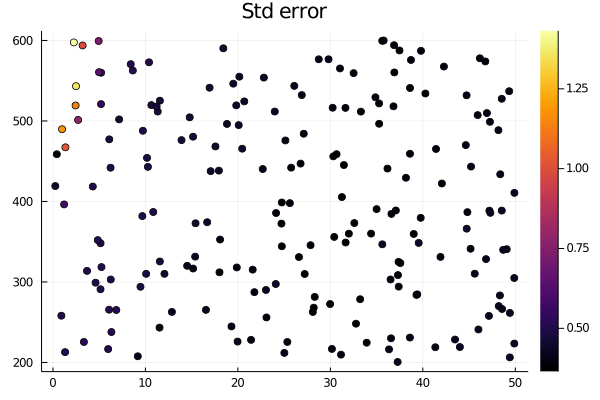

In [82]:
scatter(summaries[:,1], summaries[:,2], zcolor=summaries[:,4], title="Std error", label=false)

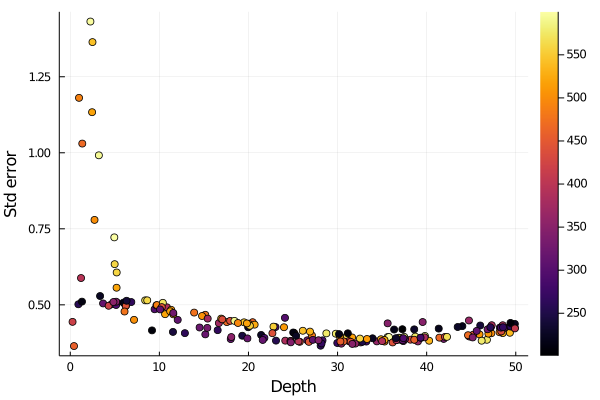

In [9]:
scatter(summaries[:,1], summaries[:,4], zcolor=summaries[:,2], label=false, xlabel="Depth", ylabel="Std error")

In [80]:
summaries

200×4 Array{Float64,2}:
 28.101    262.73    0.418903   0.365612
 49.8936   223.459   0.622414   0.437261
 31.0409   565.22    0.189525   0.397838
 36.8915   594.095   0.271342   0.39199
 19.3051   244.76    0.27661    0.398431
  2.49348  543.229  -1.72691    1.36395
 45.9317   507.257   0.49346    0.402912
 29.8034   576.592   0.163977   0.405128
  3.34652  225.489   0.0439499  0.528946
 23.0884   255.944   0.397509   0.382295
 35.6131   599.545   0.240668   0.394122
 31.6328   516.239   0.262392   0.392803
  9.46559  294.019   0.0971233  0.485376
  ⋮                             
 37.4757   587.574   0.292883   0.394833
 37.3905   294.206   0.50159    0.390304
 25.348    225.461   0.450092   0.398387
 27.8602   345.666   0.317796   0.383578
  6.09105  477.152  -0.0694048  0.478061
  1.3122   212.834   0.0772358  0.510543
 18.4254   590.21   -0.0579953  0.447314
  4.30771  418.533  -0.039569   0.496917
 18.8208   496.308   0.108427   0.440312
  4.84721  351.993   0.0144616  0.509284
 2

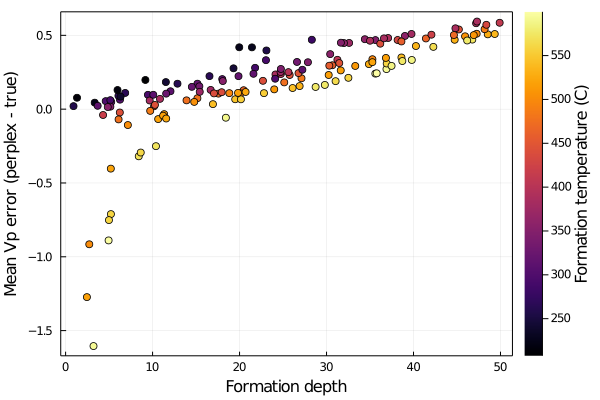

In [148]:
filter = summaries[:,5] .< 50
scatter(summaries[filter,1], summaries[filter,3], zcolor=summaries[filter,2], 
    label=false, xlabel="Formation depth", ylabel="Mean Vp error (perplex - true)", 
    colorbartitle="Formation temperature (C)", framestyle=:box)
#savefig("../thesis/viz/vp_er_trend.png")

# Compare A&H workbook data using VRH and VS bounds

In [11]:
ah_dat, ah_header = readdlm("../data/dabie_ah.csv", ',', header=true)
ah_header = ah_header[:];

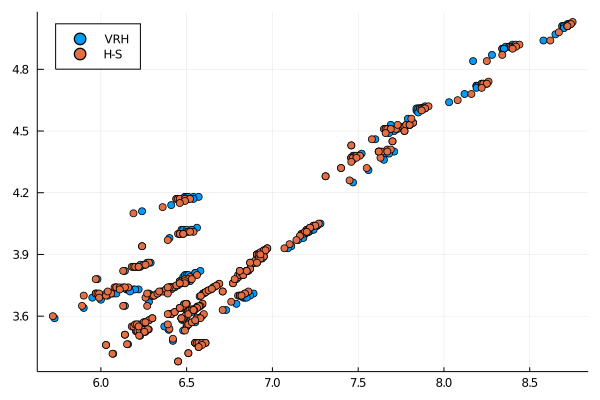

In [12]:
scatter(ah_dat[:,5], ah_dat[:,6], label="VRH")
scatter!(ah_dat[:,9], ah_dat[:,10], label="H-S", legend=:topleft)


# Difference in Vp Vp/Vs space 

In [13]:
i_vp = 8 # vp 
i_vpvs = 9 # vpvs 
i_vp_er = 11
i_vpvs_er = 12

#target = (40,550)
target = (20,450)
j = argmin(sqrt.((conditions[:,1].-target[1]).^2 .+ (conditions[:,2].-target[2]).^2))

highp = false
if highp
    filter = ((dat[j,:,4] .== 600) .& (dat[j,:,5] .== 600))[:]
    ah_filter = ((ah_dat[:,4] .== 600) .& (ah_dat[:,3] .== 600))
else
    filter = ((dat[j,:,4] .== 100) .& (dat[j,:,5] .== 20))[:]
    ah_filter = ((ah_dat[:,4] .== 100) .& (ah_dat[:,3] .== 20))
end

if highp
    cond = "600 MPa, 600 C"
else
    cond = "100 MPa, 20 C"
end
    
scatter(dat[j,:,i_vp][filter], dat[j,:,i_vpvs][filter], label="Perple_X")
scatter!(dat[j,:,i_vp][filter] .- dat[j,:,i_vp_er][filter], 
    dat[j,:,i_vpvs][filter] .- dat[j,:,i_vpvs_er][filter], label="Lab",
    xlabel="Vp", ylabel="VpVs", 
    title="Formation $(target[1])km, $(target[2]) C;  sampling $cond")
scatter!(ah_dat[ah_filter,9], ah_dat[ah_filter,11], label="AH")

savefig("../../present/4_16/lowlow.pdf")

# Is the error correlated with %sio2?

In [14]:
comp, comph = readdlm("../data/kern_dabie_comp.csv", ',', header=true);
comph=comph[:];

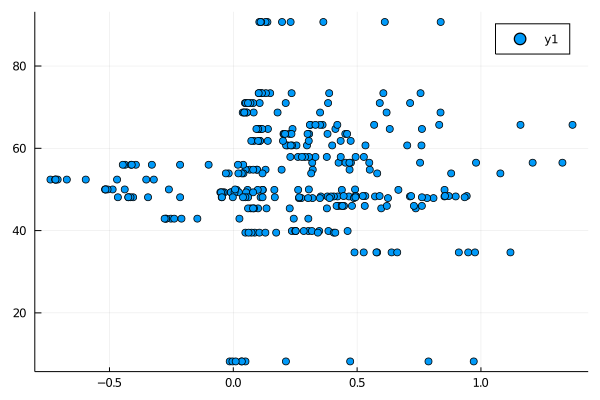

In [15]:
scatter(dat[j,:,i_vp_er], comp[Integer.(dat[j,:,3]),2])

# Check sample I'm using for lower crust

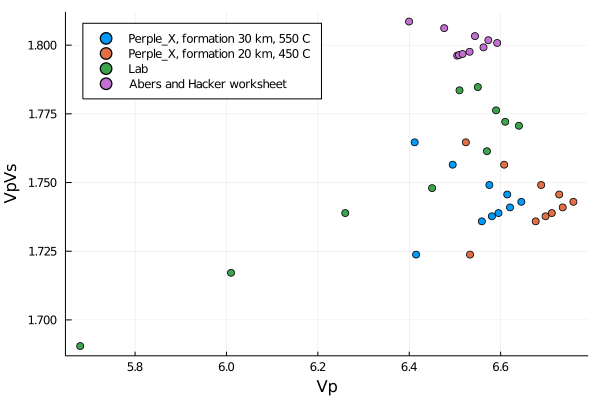

In [16]:
t1 = (30,550)
t2 = (20,450)
j1 = argmin(sqrt.((conditions[:,1].-t1[1]).^2 .+ (conditions[:,2].-t1[2]).^2))
j2 = argmin(sqrt.((conditions[:,1].-t2[1]).^2 .+ (conditions[:,2].-t2[2]).^2))


filter = (dat[j1,:,3] .== 2)[:] # D95-11 is sample #2
scatter(dat[j1,:,i_vp][filter], dat[j,:,i_vpvs][filter], label="Perple_X, formation $(t1[1]) km, $(t1[2]) C")

filter = (dat[j2,:,3] .== 2)[:] # D95-11 is sample #2
scatter!(dat[j2,:,i_vp][filter], dat[j2,:,i_vpvs][filter], label="Perple_X, formation $(t2[1]) km, $(t2[2]) C")

scatter!(dat[j2,:,i_vp][filter] .- dat[j2,:,i_vp_er][filter], 
    dat[j2,:,i_vpvs][filter] .- dat[j2,:,i_vpvs_er][filter], label="Lab",
    xlabel="Vp", ylabel="VpVs", legend=:topleft)

ah_filter = ah_dat[:,1] .== 2
scatter!(ah_dat[ah_filter,9], ah_dat[ah_filter,11], label="Abers and Hacker worksheet")

#savefig("../../present/4_16/lowercrust.pdf")

# Compare A&H to Kern 

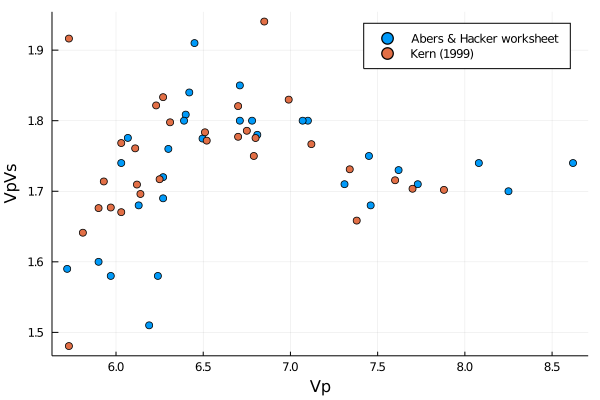

In [65]:
ah_target = ah_dat[(ah_dat[:,3] .== 600) .& (ah_dat[:,4] .== 600),:]
p_target = dat[j1,(dat[j1,:,4] .== 600) .& (dat[j1,:,5] .== 600),:]

scatter(ah_target[:,9], ah_target[:,11], label="Abers & Hacker worksheet")
#scatter(p_target[:,9], p_target[:,11])

scatter!(p_target[:,i_vp] .- p_target[:,i_vp_er], 
    p_target[:,i_vpvs] .- p_target[:,i_vpvs_er], label="Kern (1999)",
    xlabel="Vp", ylabel="VpVs", legend=:topright)

#scatter!(p_target[:,i_vp] , p_target[:,i_vpvs], label="Perple_X")

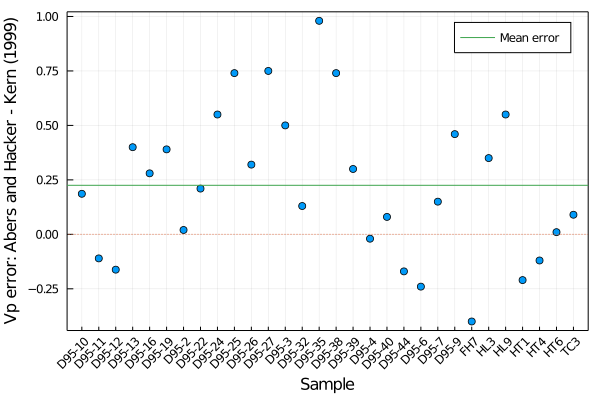

In [150]:
scatter(1:size(ah_target,1), ah_target[:,9] .- (p_target[:,i_vp] .- p_target[:,i_vp_er]), 
    label=false, xticks=(collect(1:size(ah_target,1)), ah_target[:,2]), 
    xrotation=45, framestyle=:box
)
#scatter!(1:size(ah_target,1), p_target[:,i_vp_er], label=false)

hline!([0.0], linestyle=:dot, label=false, 
    ylabel="Vp error: Abers and Hacker - Kern (1999)", xlabel="Sample")
hline!([mean(ah_target[:,9] .- (p_target[:,i_vp] .- p_target[:,i_vp_er]))], label="Mean error")
#savefig("../thesis/viz/vp_ah_kern.png")

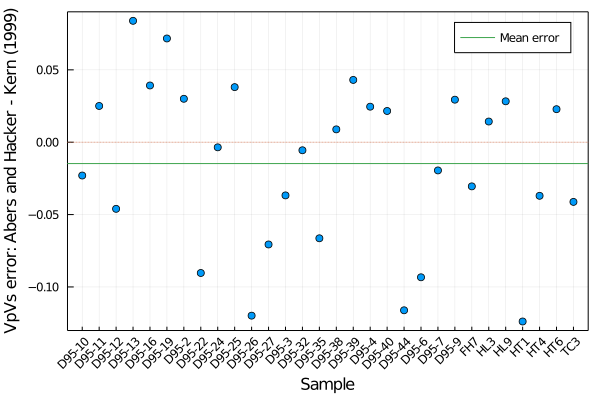

In [152]:
scatter(1:size(ah_target,1), ah_target[:,11] .- (p_target[:,i_vpvs] .- p_target[:,i_vpvs_er]),
    label=false, xticks=(collect(1:size(ah_target,1)), ah_target[:,2]), 
    xrotation=45, framestyle=:box
)


hline!([0.0], linestyle=:dot, label=false, 
    ylabel="VpVs error: Abers and Hacker - Kern (1999)", xlabel="Sample")
hline!([mean(ah_target[:,11] .- (p_target[:,i_vpvs] .- p_target[:,i_vpvs_er]))], label="Mean error")
#savefig("../thesis/viz/vpvs_ah_kern.png")

# Compare Perple_X and Kern

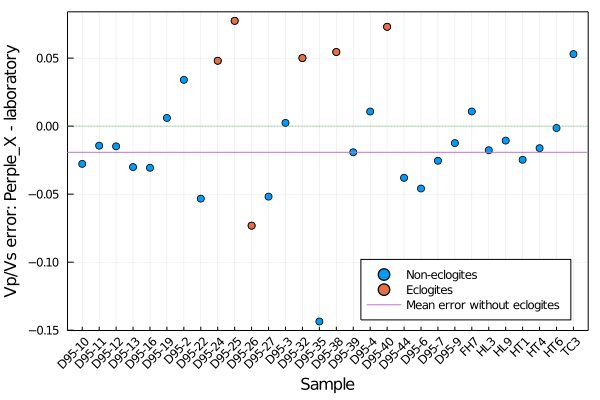

In [170]:
p_target = dat[j1,(dat[j1,:,4] .== 600) .& (dat[j1,:,5] .== 400),:]
samples = comp[Integer.(p_target[:,3]),1] # sample names 

scatter(1:size(p_target,1), p_target[:,i_vpvs_er], label="Non-eclogites", 
    xticks=(linspace(1,length(samples),length(samples)), samples), 
    xrotation=45)

eclogites = [s in ["D95-24", "D95-25", "D95-26", "D95-32", "D95-38", "D95-40"] for s in samples]
scatter!([i for i in 1:length(eclogites) if eclogites[i]], p_target[eclogites,i_vpvs_er], 
    label="Eclogites", framestyle=:box, legend=:bottomright)

hline!([0.0], linestyle=:dot, label=false, 
    ylabel="Vp/Vs error: Perple_X - laboratory", xlabel="Sample")
hline!([mean(p_target[.!eclogites,i_vpvs_er])], label="Mean error without eclogites")
    #framestyle=:box)
#savefig("../../THESIS/thesis/figures/vpvs_perplex_kern.png")

In [177]:
mean(p_target[.!eclogites,i_vpvs_er])

-0.019214259040903153

In [165]:
include("../src/config.jl")


"/Users/gailin/dartmouth/crustal_structure/perplexed_pasta/"

# Mineral composition

In [17]:
high_comp = load("../data/perplexEndmembers_30_550.jld")["dat"];
low_comp = load("../data/perplexEndmembers_20_450.jld")["dat"];

In [18]:
cutoff = 5 # cutoff percentage for major mineral components 
all_major = Set()
for i in keys(high_comp)
    for k in keys(high_comp[i])
        if high_comp[i][k] > cutoff
            push!(all_major, k)
        end
    end
    for k in keys(low_comp[i])
        if low_comp[i][k] > cutoff
            push!(all_major, k)
        end
    end
end

In [19]:
# Translation from major mineral components to those used in dabie: 
# omphacite, orthopyroxene, clinopyroxene, garnet, amphibole, tremolite, 
# olivine, epidote, biotite, muscovite, 
# chlorite, plagioclase, 
# K-feldspar, quartz, carbonate, apatite, opaques, sphene, 
# serpentine

perplex_dabie_translate = Dict([
        ("zo", "epidote")
        ("phl", "biotite")
        ("alm", "garnet")
        ("hed", "clinopyroxene")
        ("en", "orthopyroxene")
        ("ftr", "amphibole")
        ("ts", "amphibole")
        ("ged", "amphibole")
        ("anth", "amphibole")
        ("jd", "omphacite")
        ("dol", "carbonate")
        ("daph", "chlorite")
        ("ab", "plagioclase") 
        ("q", "quartz")
        ("clin", "chlorite")
        ("ank", "carbonate")
        ("an", "plagioclase")
        ("pa", "muscovite")
        ("fanth", "amphibole")
        ("fs", "orthopyroxene")
        ("fo", "olivine")
        ("fcel", "muscovite")
        ("mic", "K-feldspar")
        ("tr", "amphibole")
        ("ann", "biotite")
        ("naph", "biotite")
        ("di", "clinopyroxene")
        ("cc", "calcite")
        ("cel", "muscovite")
        ("abh", "plagioclase")
        ("ilm", "ilmenite")
        ("sph", "sphene")
        ("gr", "garnet")
        ("py", "garnet")
        ("fa", "olivine")
        ("parg", "amphibole")
        ]);

reverse=Dict([
        ("omph", "omphacite"),
        ("opx", "orthopyroxene"),
        ("cpx", "clinopyroxene"),
        ("gt", "garnet"),
        ("amph", "amphibole"),
        ("trem", "tremolite"), ("ol", "olivine"), 
        ("ep", "epidote"),
        ("bt", "biotite"), ("ms", "muscovite"), 
        ("chl","chlorite"), ("plg", "plagioclase"), 
        ("fsp", "K-feldspar"),
        ("qu", "quartz"), ("carb", "carbonate"),
        ("apat", "apatite"), ("opaq", "opaques"), 
        ("sph", "sphene"), ("serp","serpentine")
        ])
dabie_name_translate = Dict()
for k in keys(reverse)
    dabie_name_translate[reverse[k]] = k
end

# Unique minerals from above in order consistent with Dabie paper 
min_order = ["omphacite", "orthopyroxene",  "clinopyroxene", 
    "garnet", "amphibole", "tremolite", "olivine", 
    "epidote", "biotite", 
    "muscovite", "chlorite",
    "plagioclase", "K-feldspar", "quartz", "carbonate", 
    "apatite", "opaques",
    "sphene", "serpentine", "calcite", "ilmenite"];

In [20]:
info, minh = readdlm("../data/kern_dabie_minmode.csv", ',', header=true);
minh= minh[:];
info[info .== ""] .= 0.0;

In [21]:
low_translated = fill(0.0, length(keys(low_comp)), length(min_order))
for i in 1:30
    for (j,m) in enumerate(min_order)
        for k in keys(low_comp[i])
            if get(perplex_dabie_translate, k, "") == m
                low_translated[i,j] += low_comp[i][k]
            end
        end
    end
end

high_translated = fill(0.0, length(keys(high_comp)), length(min_order))
for i in 1:30
    for (j,m) in enumerate(min_order)
        for k in keys(high_comp[i])
            if get(perplex_dabie_translate, k, "") == m
                high_translated[i,j] += high_comp[i][k]
            end
        end
    end
end

In [22]:
#dabie_translated = Array{Any,2}(undef, (length(keys(high_comp)), length(min_order)))
dabie_translated = fill(0.0, length(keys(low_comp)), length(min_order)) 
for i in 1:30
    for (j,m) in enumerate(min_order)
        if ! (m in keys(dabie_name_translate))
            continue
        end
        old_j = findfirst(isequal(dabie_name_translate[m]), minh)
        dabie_translated[i,j] = info[i,old_j]
    end
end


In [23]:
function format(out, row, incl_name = false)
    out[out .< 1] .= 0
    out = join(round.(out,sigdigits=2), " & ")
    out = replace(out, ".0 "=>" ")
    if incl_name
        out = string(ah_dat[row,2], " & ", info[row,2], " & ", out, " \\\\")
    else 
        out = string( " &  & ", out, " \\\\")
    end
    out = replace(out, " 0 "=>" - ")
    out = replace(out, " 0.0 "=>" - ")
    println(out)
end

for row in 1:size(low_translated)[1]
    format(dabie_translated[row,:], row, true)
    format(high_translated[row,:], row)
    format(low_translated[row,:], row)
    println("\\hline")
    if (row % 10) == 0 
        println()
        println()
        println()
        println()
        println()
        println()
    end
end

D95-10 & Tonalitic gneiss & - & - & - & - & 32 & - & - & - & 6 & - & - & 50 & - & 11 & - & - & - & - & - & - & - \\
 &  & - & - & - & 1.6 & 31 & - & - & - & - & 20 & - & 34 & 9.6 & 1.4 & - & - & - & - & - & - & - \\
 &  & - & - & - & - & 36 & - & - & - & - & 17 & - & 30 & 12 & 1.5 & - & - & - & 1.3 & - & - & - \\
\hline
D95-11 & Gabbro xenolith in D95-10 & - & - & 4 & - & 37 & - & - & - & 18 & - & - & 39 & - & 2 & - & - & - & - & - & - & - \\
 &  & 2.1 & - & 14 & 8.6 & 19 & - & - & - & 10 & 24 & - & 19 & 1.3 & - & - & - & - & - & - & - & 1.5 \\
 &  & - & - & - & 7.4 & 30 & - & - & 7.2 & 14 & - & 3.6 & 29 & 5.4 & - & - & - & - & 1.3 & - & - & - \\
\hline
D95-12 & Metapelite xenolith in D95-10 & - & - & - & - & 47 & - & - & - & 18 & - & - & - & 30 & 5 & - & - & - & - & - & - & - \\
 &  & 1.1 & - & 7.4 & - & 31 & - & - & - & 12 & 14 & - & 5 & 28 & - & - & - & - & - & - & - & - \\
 &  & - & - & 4.1 & - & 32 & - & - & - & 12 & - & 4.6 & 12 & 32 & - & - & - & - & 1.6 & - & - & - \\
\hline
D9

In [24]:
print(join(min_order, "\", \""))

omphacite", "orthopyroxene", "clinopyroxene", "garnet", "amphibole", "tremolite", "olivine", "epidote", "biotite", "muscovite", "chlorite", "plagioclase", "K-feldspar", "quartz", "carbonate", "apatite", "opaques", "sphene", "serpentine", "calcite", "ilmenite

In [25]:

println(high_comp[28]["abh"])
println(low_comp[28]["ab"] + low_comp[28]["abh"])

27.640686000000002
27.302391999999998


In [26]:
perplex = Set(unique(values(perplex_dabie_translate)))
dabie = Set(["omphacite", "orthopyroxene", "clinopyroxene", "garnet", "amphibole", 
        "tremolite", "olivine", "epidote", "biotite", "muscovite", "chlorite", "plagioclase", 
        "K-feldspar", "quartz", "carbonate", "apatite", "opaques", "sphene", 
        "serpentine"]);
println(setdiff(perplex, dabie))
println(setdiff(dabie, perplex))


Set(["calcite", "ilmenite"])
Set(["opaques", "serpentine", "apatite", "tremolite"])


# Difference in partitioning of endmembers

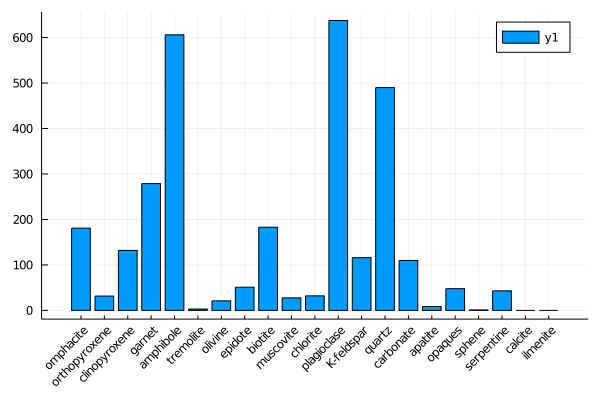

In [27]:
b1 = bar(min_order, sum(dabie_translated, dims=1)[:], 
    xticks=(linspace(0.5,length(min_order)-.5,length(min_order)), min_order), 
    xrotation=45)


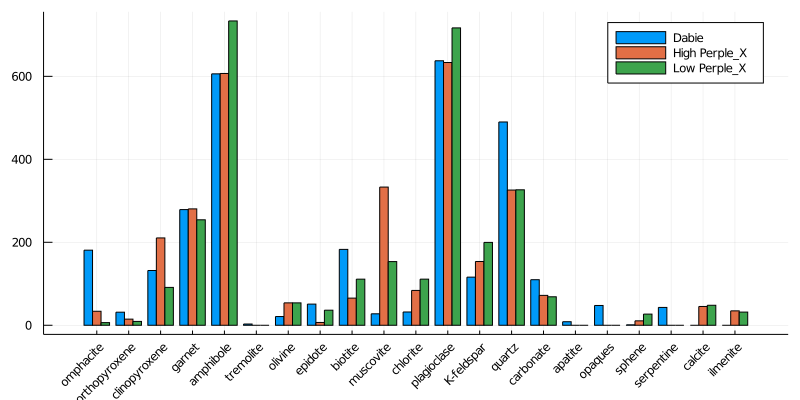

In [28]:
plotdat = hcat(sum(dabie_translated, dims=1)[:], 
                sum(low_translated, dims=1)[:],
                sum(high_translated, dims=1)[:])

ctg = repeat(["Dabie", "Low Perple_X", "High Perple_X"], inner = size(plotdat)[1])
nam = repeat(1:length(min_order), outer = size(plotdat)[2])

groupedbar(nam, plotdat, group=ctg,
    xticks=(linspace(1,length(min_order),length(min_order)), min_order), 
    xrotation=45, size=(800,400))

#savefig("../../present/4_16/minmodes.pdf")

In [29]:
# What if we separate by high and low SiO2? 
compdat, comph = readdlm("../data/kern_dabie_comp.csv", ',', header=true)

(Any["D95-10" 54.8 … 1.6 99.6; "D95-11" 49.9 … 1.8 99.6; … ; "HT6" 48.1 … 1.7 99.9; "TC3" 57.9 … 0.7 99.3], AbstractString["Sample No." "SiO2" … "H2OC" "Total"])

In [30]:
mafic = compdat[:,2] .< 60 
felsic = compdat[:,2] .>= 60 ;


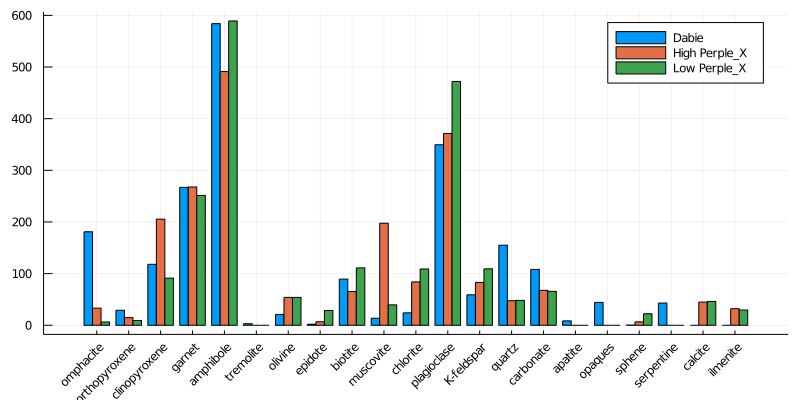

In [31]:
#MAFIC 

plotdat = CategoricalArray(hcat(sum(dabie_translated[mafic,:], dims=1)[:], 
                sum(low_translated[mafic,:], dims=1)[:],
                sum(high_translated[mafic,:], dims=1)[:]))

#plotdat = CategoricalArray(plotdat)
ctg = repeat(["Dabie", "Low Perple_X", "High Perple_X"], 
        inner = size(plotdat)[1])
nam = repeat(1:length(min_order), outer = size(plotdat)[2])


groupedbar(nam, plotdat, group=ctg,
    #xticks=min_order,
    xticks=(linspace(1,length(min_order),length(min_order)), min_order), 
    xrotation=45, size=(800,400))

#savefig("../../present/4_16/minmodes_mafic.pdf")

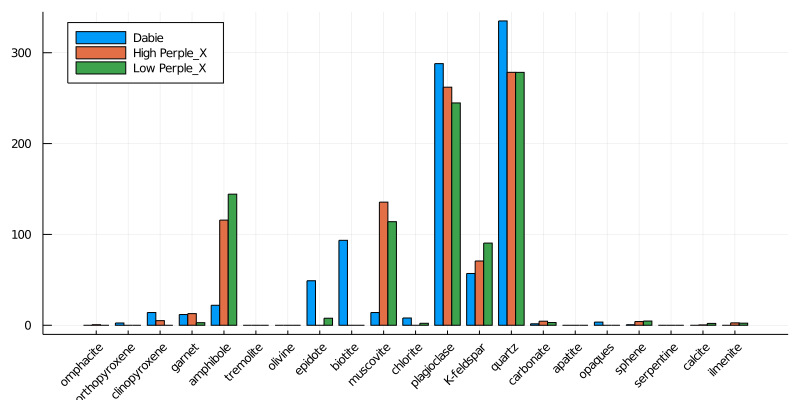

In [32]:
#FELSIC 

plotdat = hcat(sum(dabie_translated[felsic,:], dims=1)[:], 
                sum(low_translated[felsic,:], dims=1)[:],
                sum(high_translated[felsic,:], dims=1)[:])

ctg = repeat(["Dabie", "Low Perple_X", "High Perple_X"], inner = size(plotdat)[1])
nam = repeat(1:length(min_order), outer = size(plotdat)[2])

groupedbar(nam, plotdat, group=ctg,
    xticks=(linspace(1,length(min_order),length(min_order)), min_order), 
    xrotation=45, size=(800,400), legend=:topleft)

#savefig("../../present/4_16/minmodes_felsic.pdf")

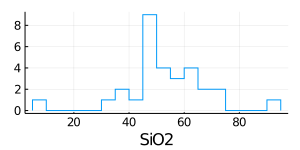

In [33]:
stephist(compdat[:,2], xlabel="SiO2", bins=20, 
    lineweight=3, legend=false, size=(300,150))
#savefig("../../present/4_16/dabie_dist.pdf")

# Difference as L1 norm

In [34]:
l1_norms = fill(NaN, size(dabie_translated)[1])
for i in 1:length(l1_norms)
    l1_norms[i] = sum([abs(dabie_translated[i,j] - low_translated[i,j]) for j in 1:size(dabie_translated)[2]])
end



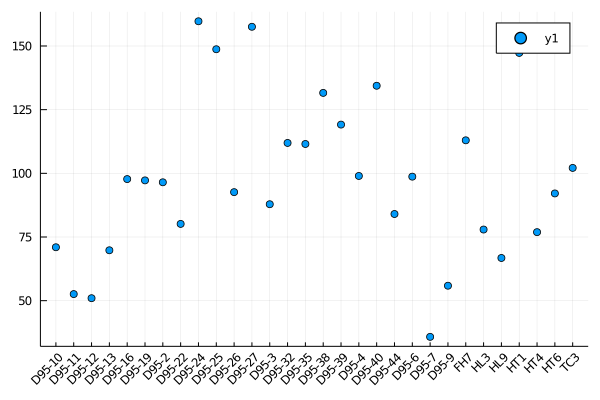

In [35]:
scatter(1:length(l1_norms), l1_norms, xticks=(1:length(ah_dat[1:30,2]), ah_dat[1:30,2]), 
    xrotation=45)

## What would the L1 norm be with random mineral assignments?

In [36]:
mc = 10000
res = fill(NaN, (mc, size(dabie_translated)[1]))

for r in 1:mc
    randmin = reshape(rand(length(dabie_translated)), size(dabie_translated))
    for j in 1:size(randmin)[1]
        randmin[j,:] .= randmin[j,:] ./ sum(randmin[j,:])
    end
    randmin = randmin .* 100;
    
    for i in 1:length(l1_norms)
        res[r, i] = sum([abs(dabie_translated[i,j] - randmin[i,j]) for j in 1:size(dabie_translated)[2]])
    end
    
end

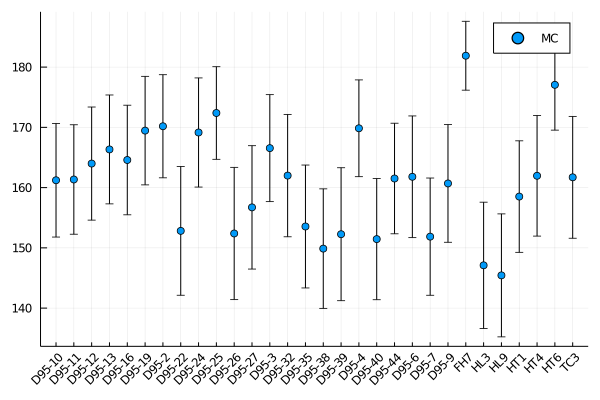

In [37]:
p1 = scatter(1:size(res)[2], mean(res, dims=1)[:], yerr=std(res,dims=1)[:], 
    xticks=(1:length(ah_dat[1:30,2]), ah_dat[1:30,2]), 
    xrotation=45, label="MC")

In [38]:
### Compare to l1 norms of actual mineral predictions 

l1_norms_low = fill(NaN, size(dabie_translated)[1])
for i in 1:length(l1_norms_low)
    l1_norms_low[i] = sum([abs(dabie_translated[i,j] - low_translated[i,j]) for j in 1:size(dabie_translated)[2]])
end

l1_norms_high = fill(NaN, size(dabie_translated)[1])
for i in 1:length(l1_norms_high)
    l1_norms_high[i] = sum([abs(dabie_translated[i,j] - high_translated[i,j]) for j in 1:size(dabie_translated)[2]])
end


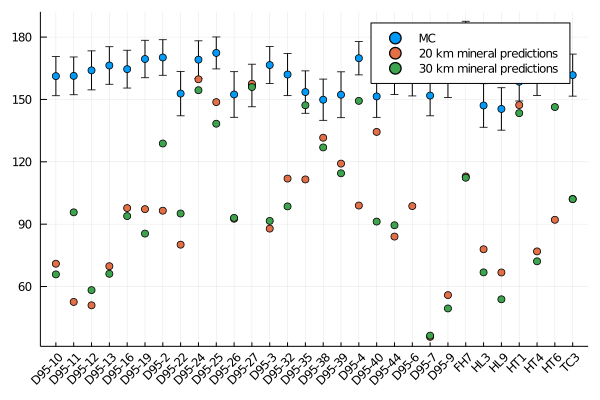

In [39]:
p1 = scatter!(p1, 1:length(l1_norms_low), l1_norms_low, label="20 km mineral predictions")
p1 = scatter!(p1, 1:length(l1_norms_high), l1_norms_high, label="30 km mineral predictions")

## Do we do better than assigning the mean mineral breakdown to each sample? 

In [40]:
means = mean(dabie_translated, dims=1)
means .= means ./ sum(means)
means = means .* 100

1×21 Array{Float64,2}:
 6.03253  1.04986  4.39941  9.29209  20.1973  …  0.0366618  1.43314  0.0  0.0

In [41]:
l1_norms_from_mean = fill(NaN, size(dabie_translated)[1])
for i in 1:length(l1_norms_from_mean)
    l1_norms_from_mean[i] = sum([abs(dabie_translated[i,j] - means[j]) for j in 1:size(dabie_translated)[2]])
end


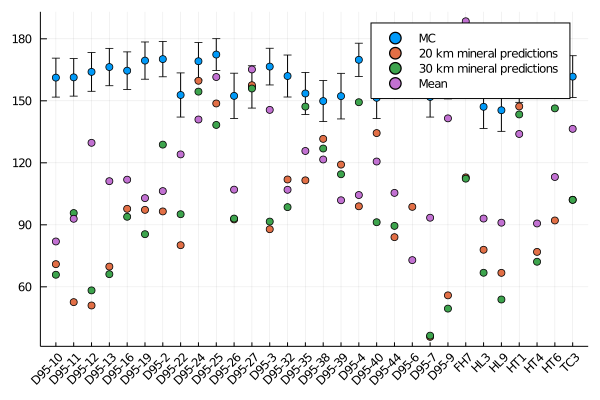

In [42]:
p1 = scatter!(p1, 1:length(l1_norms_from_mean), l1_norms_from_mean, label="Mean")

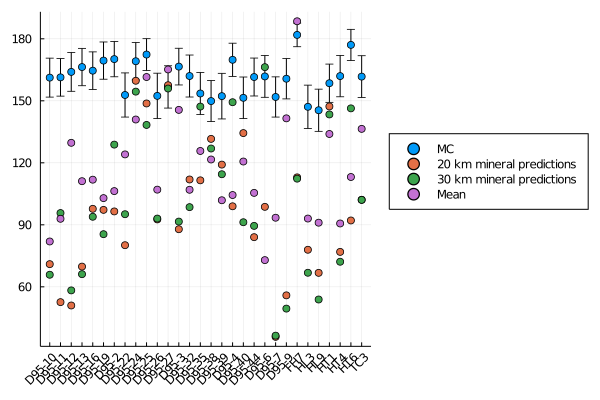

In [43]:
scatter!(p1, legend=:outerright)

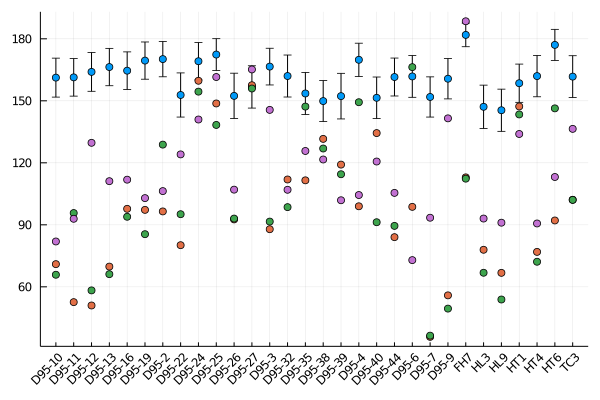

In [44]:
scatter!(p1, legend=false)